In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
# Droping the duplicates 
print(df.duplicated().sum())
df.drop_duplicates(keep = 'first', inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53794 non-null  float64 
 8   y        53794 non-null  float64 
 9   z        53794 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

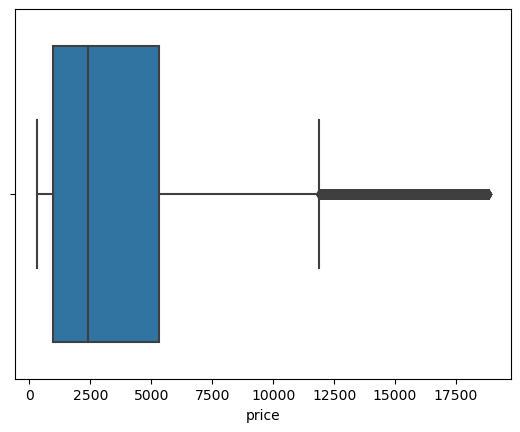

In [8]:
# Boxplot to find the outlayers
sns.boxplot(df.price)

In [13]:
# Removing the outlayers using zscore
from scipy import stats
df = df[stats.zscore(df.price) < 3]

In [14]:
# Segrigating input and output 
X = df[['carat','cut','color','clarity','depth','table','x','y','z']]
y = df.price

In [15]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)


(39444, 9) (13149, 9)
(39444,) (13149,)


In [16]:
# Splitting the catgorical and nuemerical data in X_train

X_train_cat = X_train.select_dtypes('category')
X_train_num = X_train.select_dtypes(['int64','float64'])



## Preprocessing the data

In [17]:
# Rescaling the nuemerical data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_num_trans = pd.DataFrame(scalar.fit_transform(X_train_num),columns= X_train_num.columns,
                                 index = X_train_num.index)

In [18]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [19]:
# Transforming the catgorical data in label encoding in manuval way
dict_ = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
 
X_train_cat_trans = pd.DataFrame(index= X_train_cat.index)  # crating an empty dataframe to encode
X_train_cat_trans['cut'] = X_train_cat.cut.apply(lambda x : dict_[x])

dict_color = {'E':6,'I':2,'J':1,'H':3,'F':5,'G':4,'D':7}
X_train_cat_trans['color'] = X_train_cat.color.apply(lambda x : dict_color[x])

dict_clarity = {'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}
X_train_cat_trans['clarity'] = X_train_cat.clarity.apply(lambda x : dict_clarity[x])


# concatinating the nuemerical and catgorical X_train data
X_train_trans = pd.concat([X_train_cat_trans,X_train_num_trans],axis=1)

In [29]:
# Splitting the catgorical and nuemerical data in X_test
X_test_cat = X_test.select_dtypes('category')
X_test_num = X_test.select_dtypes(['int64','float64'])

# Rescaling the nuemerical data
X_test_num_trans = pd.DataFrame(scalar.transform(X_test_num),columns= X_test_num.columns,
                                 index = X_test_num.index)

# the same thing for the test data,encoding manuvally and then concatining
X_test_cat_trans = pd.DataFrame(index= X_test_cat.index)

X_test_cat_trans['cut'] = X_test_cat.cut.apply(lambda x : dict_[x])
X_test_cat_trans['color'] = X_test_cat.color.apply(lambda x : dict_color[x])
X_test_cat_trans['clarity'] = X_test_cat.clarity.apply(lambda x : dict_clarity[x])

X_test_trans = pd.concat([X_test_cat_trans,X_test_num_trans],axis = 1)

## Training

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_trans,y_train)

LinearRegression()

In [39]:
y_test_pre = regressor.predict(X_test_trans)

In [40]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pre)

771.709468558563

In [43]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)

353.19969579435707

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)

328.54437599817476

In [44]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)

1152.8354650012006

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)

247.8865632901651

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_trans,y_train)
y_test_pre = regressor.predict(X_test_trans)
metrics.mean_absolute_error(y_test,y_test_pre)

360.1734366108499

### conclusion
    RandomForestRegressor is giving the best score 
    with mean_absolute_error of 247.88

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
